In [1]:
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
import pandas as pd


In [2]:
df=load_iris(as_frame=True)
train = df['data']
target = df['target']
mapping = {i:v for i,v in enumerate(['Setosa', 'Versicolour', 'Virginica'])}
target_name = target.map(mapping)
df = pd.concat((train, target_name), axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
X = df.drop('target', axis=1).to_numpy()
inverse_map = {v:k for k,v in mapping.items()}
y = df['target'].map(inverse_map).to_numpy().astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0xC0FFEE)

In [4]:
print(len(X_train))
print(len(X_test))

120
30


In [5]:
print(X_train[:5])
print(y_train[:5])

[[6.7 3.1 4.7 1.5]
 [6.  2.2 4.  1. ]
 [5.1 3.5 1.4 0.3]
 [5.5 2.4 3.8 1.1]
 [5.6 2.5 3.9 1.1]]
[1 1 0 1 1]


In [6]:
############
# AdaBoost #
############

# Train a bunch of weak learners - default is decision tree of depth 1, e.g. stump
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [7]:
for i in range(5):
  accuracy = clf.estimators_[i].score(X_test, y_test)
  weight = clf.estimator_weights_[i]
  print(f'accuracy of stump {i}: {accuracy}, weight: {weight}')

accuracy of stump 0: 0.6666666666666666, weight: 1.0
accuracy of stump 1: 0.4666666666666667, weight: 1.0
accuracy of stump 2: 0.8, weight: 1.0
accuracy of stump 3: 0.4666666666666667, weight: 1.0
accuracy of stump 4: 0.8, weight: 1.0


In [8]:
print('overall score:', clf.score(X_test, y_test))

overall score: 0.9333333333333333


In [9]:
###########
# Bagging #
###########
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(),
                         max_samples=0.5, max_features=0.5)
bagging.fit(X_train, y_train)

BaggingClassifier(estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5)

In [10]:
for i in range(5):
  features = bagging.estimators_features_[i]
  cols = list(df.columns[features])
  print(f'estimator {i} is using features {cols}')

print('\noverall accuracy:', bagging.score(X_test, y_test))

estimator 0 is using features ['petal length (cm)', 'sepal length (cm)']
estimator 1 is using features ['sepal width (cm)', 'petal length (cm)']
estimator 2 is using features ['sepal width (cm)', 'petal width (cm)']
estimator 3 is using features ['petal length (cm)', 'petal width (cm)']
estimator 4 is using features ['sepal width (cm)', 'sepal length (cm)']

overall accuracy: 0.9666666666666667


In [11]:
#################
# Random forest #
#################

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
for i in range(5):
  accuracy = clf.estimators_[i].score(X_test, y_test)
  print(f'estimator {i} has accuracy: {accuracy}')

print('\nOverall accuracy:', clf.score(X_test, y_test))

estimator 0 has accuracy: 0.9
estimator 1 has accuracy: 0.9333333333333333
estimator 2 has accuracy: 0.9666666666666667
estimator 3 has accuracy: 0.9333333333333333
estimator 4 has accuracy: 0.9666666666666667

Overall accuracy: 0.9666666666666667


In [13]:
##########################
# Gradient tree boosting #
##########################
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, max_depth=1, random_state=0xC0FFEE)
clf.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=1, random_state=12648430)

In [14]:
print('estimators[0]', clf.estimators_[0])
print('\nOverall_score',clf.score(X_test, y_test))

estimators[0] [DecisionTreeRegressor(criterion='friedman_mse', max_depth=1,
                       random_state=RandomState(MT19937) at 0x7F1495838540)
 DecisionTreeRegressor(criterion='friedman_mse', max_depth=1,
                       random_state=RandomState(MT19937) at 0x7F1495838540)
 DecisionTreeRegressor(criterion='friedman_mse', max_depth=1,
                       random_state=RandomState(MT19937) at 0x7F1495838540)]

Overall_score 0.9666666666666667


In [15]:
import numpy as np
SAMPLE_NUM = 5
sample_X = X_test[SAMPLE_NUM].reshape(1,-1)
sample_y = y_test[SAMPLE_NUM]
preds = []
for i in range(3): # n_classes
  pred = clf.estimators_[SAMPLE_NUM, i].predict(sample_X)
  preds.append(pred)

print('predictions:', preds)
print('argmax preds', np.argmax(preds))
print('true y:', sample_y)

predictions: [array([-0.82999486]), array([0.37541446]), array([1.0965787])]
argmax preds 2
true y: 2


In [16]:
###########
# XGBoost #
###########
import xgboost as xgb

In [17]:
clf = xgb.XGBClassifier()
clf

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [18]:
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [19]:
clf.score(X_test, y_test)

0.9666666666666667

In [20]:
param = {
    'max_depth': 3,
    'eta': 0.3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

num_rounds = 10
clf = xgb.train(param, dtrain, num_rounds)

In [21]:
y_pred = np.argmax(clf.predict(dtest), axis=1)
np.mean(y_pred==y_test)

0.9666666666666667

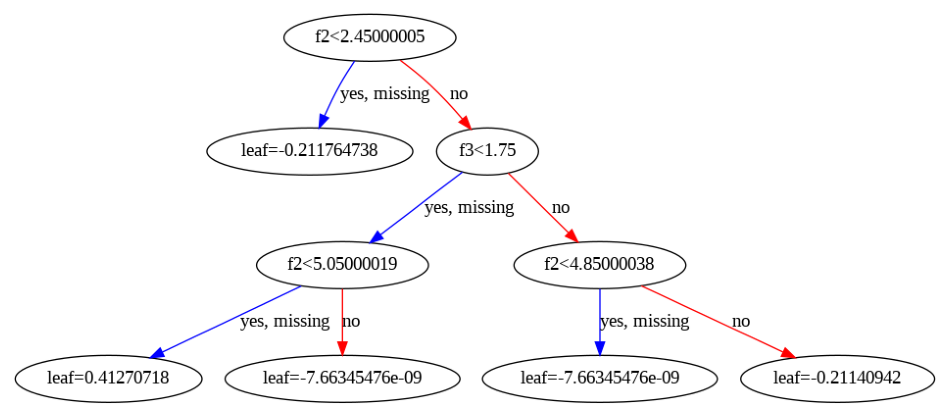

In [22]:
import matplotlib.pyplot as plt
xgb.plot_tree(clf, num_trees=1)

fig = plt.gcf()
fig.set_size_inches(12, 10)
plt.show()

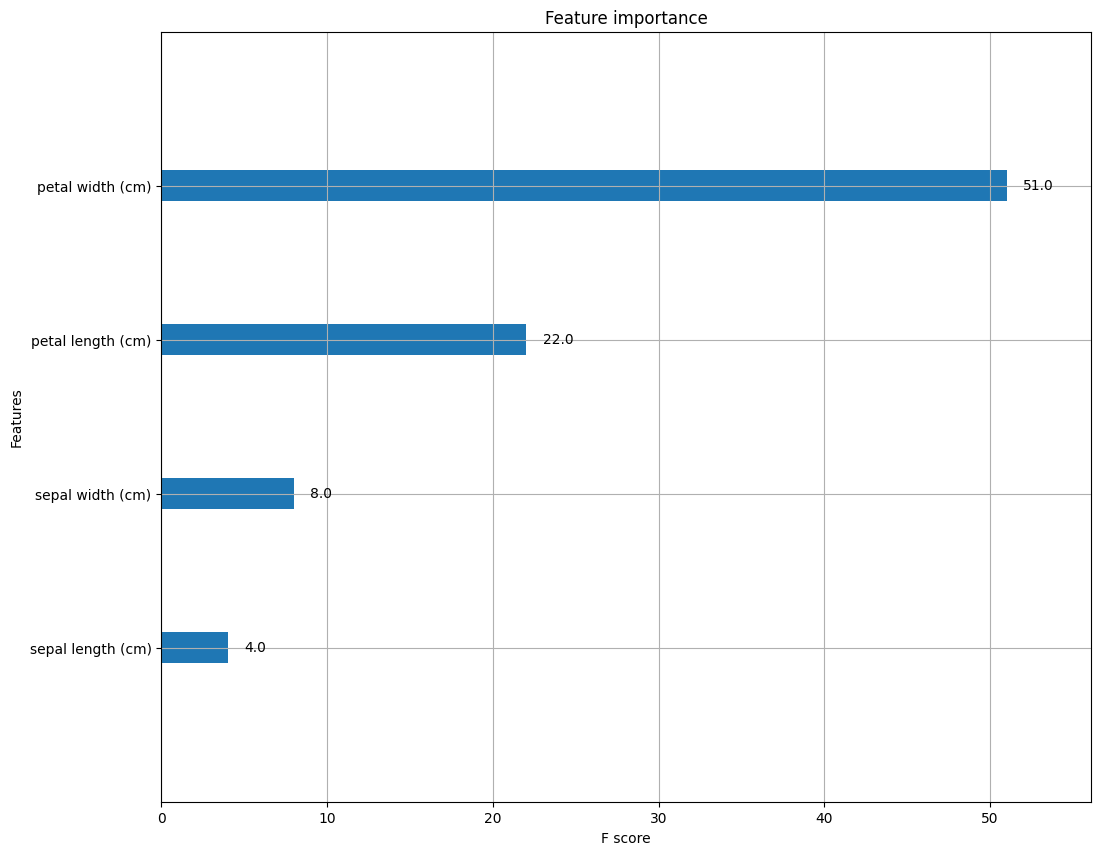

In [23]:
from xgboost import plot_importance
fig, ax = plt.subplots(1,1, figsize=(12,10))
plot_importance(clf, ax=ax)
features = [name for name in list(df.columns) if name != 'target']
ax.set_yticklabels(features)
plt.show()

In [24]:
from sklearn import svm

In [25]:
#######
# SVM #
#######

clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [26]:
print((clf.predict(X_test) == y_test).mean())

0.9666666666666667


In [27]:
def print_sv_data(clf):
  support_vectors = clf.support_vectors_
  nsv = len(support_vectors)
  print('Number of support vectors:', nsv)

In [28]:
print_sv_data(clf)

Number of support vectors: 53


In [29]:
sepal_length, sepal_width, petal_length, petal_width = np.split(X_train, (1,2,3), axis=1)
X_train_petal = np.hstack((petal_length, petal_width))

sepal_length, sepal_width, petal_length, petal_width = np.split(X_test, (1,2,3), axis=1)
X_test_petal = np.hstack((petal_length, petal_width))

In [30]:
def fit_model(m, X, y):
  import time
  start = time.time()
  m.fit(X, y)
  end = time.time()
  print('Time taken', end-start)
  return m

models = [
    svm.SVC(kernel='linear', C=1),
    svm.LinearSVC(C=1, max_iter=10_000),
    svm.SVC(kernel='rbf', gamma=.7, C=1),
    svm.SVC(kernel='poly', degree=3, gamma='auto', C=1),
    svm.SVC(kernel='poly', degree=5, gamma='auto', C=1),
    svm.SVC(kernel='poly', degree=10, gamma='auto', C=1),
]


In [31]:
M = [fit_model(clf, X_train_petal, y_train) for clf in models]

Time taken 0.005592823028564453
Time taken 0.00864863395690918
Time taken 0.001191854476928711
Time taken 0.0014655590057373047
Time taken 0.10023164749145508
Time taken 35.28248834609985


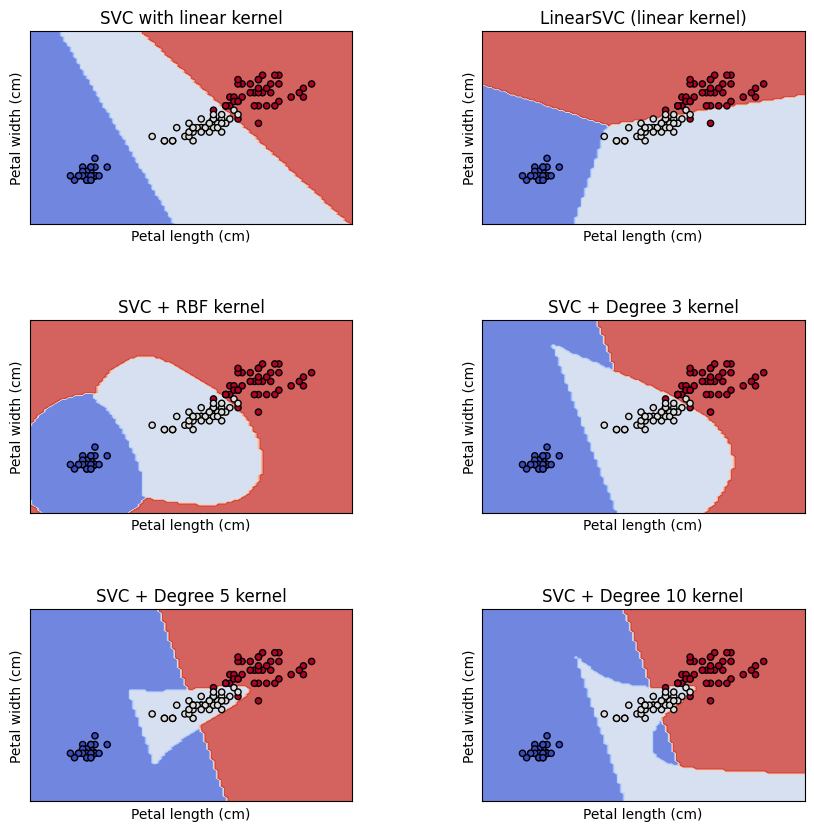

In [38]:
# Adapted from https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html#sphx-glr-auto-examples-svm-plot-iris-svc-py

from sklearn.inspection import DecisionBoundaryDisplay

titles = [
    'SVC with linear kernel',
    'LinearSVC (linear kernel)',
    'SVC + RBF kernel',
    'SVC + Degree 3 kernel',
    'SVC + Degree 5 kernel',
    'SVC + Degree 10 kernel',
]

fig, sub = plt.subplots(3, 2, figsize=(10,10))
plt.subplots_adjust(wspace=0.4, hspace=0.5)

X0, X1 = X_train_petal[:, 0], X_train_petal[:, 1]
for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_train_petal,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel='Petal length (cm)',
        ylabel='Petal width (cm)',
    )
    ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
  

plt.show()


In [40]:
for clf, title in zip(M, titles):
  pred = clf.predict(X_test_petal)
  acc = (pred == y_test).mean()
  print(f'{title}, Accuracy: {acc}')

SVC with linear kernel, Accuracy: 0.9666666666666667
LinearSVC (linear kernel), Accuracy: 0.9
SVC + RBF kernel, Accuracy: 0.9666666666666667
SVC + Degree 3 kernel, Accuracy: 0.9666666666666667
SVC + Degree 5 kernel, Accuracy: 0.9666666666666667
SVC + Degree 10 kernel, Accuracy: 0.9666666666666667


In [43]:
for clf, title in zip(M, titles):
  print(f'----- {title} -----')
  try:
    print_sv_data(clf)
  except:
    print('No support vectors')
    pass

----- SVC with linear kernel -----
Number of support vectors: 22
----- LinearSVC (linear kernel) -----
No support vectors
----- SVC + RBF kernel -----
Number of support vectors: 28
----- SVC + Degree 3 kernel -----
Number of support vectors: 13
----- SVC + Degree 5 kernel -----
Number of support vectors: 10
----- SVC + Degree 10 kernel -----
Number of support vectors: 10
